# Predict Online Gaming Behavior Analysis

The world of video games is always evolving having millions of players diving into different genres and experiencing various levels of satisfaction and enjoyment. By understanding the player engagement factors will be the key for game developers in achieving in enhancing their user experience and retention. This project will dive into a rick dataset of video game players to discover patterns and insights that will help in their game development and their marketing strategies.

### 1. Importing Libraries


In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### 2. Loading the Data

I will be using the dataset of Predict Online Gaming Behavior Dataset. You can find the dataset in this kaggle link: https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset/data that created by Rabie El Kharoua

In [47]:
data = pd.read_csv("online_gaming_behavior_dataset.csv")

### Dataset Features

In [48]:
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


The data shows having the following: <br><br>
    * PlayerID - this is the player personal identification number.<br>
    * Age - The Player Age.<br>
    * Gender - The gender of the player whether the player is male or female.<br>
    * Location - the geographic location of the player. (USA, Europe, Asia, Other)<br>
    * GameGenre - The genre in which the player prefer playing.<br>
    * PLayTimeHours - This is how long a player is playing.<br>
    * InGamePurchases - It counts how many times do the players have been purchasing.<br>
    * GameDifficulty - The difficulty of the game the player is playing.<br>
    * SessionsPerWeek - This is how many times per week the player is playing video games.<br>
    * AvgSessionDurationMinutes - Average times in the duration of minutes.<br>
    * PlayerLevel - The player level in the game.<br>
    * AchievementsUnlock - Player in game achievement they get.<br>
    * EngagementLevel - How much the player is engaging in the game.

In [49]:
data

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


The data collected have 40,034 rows of data and having 13 columns.

In [81]:
summary_stats = data.describe()

summary_stats

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


### Checking if rows have duplicate

In [78]:
print(f"Total duplicate rows: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)

Total duplicate rows: 0


### 3. Finding the mean, count, min, max of the data 

In [79]:
excluded_data = data.drop(columns='PlayerID', errors='ignore')

excluded_data_summary = excluded_data.describe()

excluded_data_summary

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


As you can in the table above, I can see in the data that the youngest players players are around 15 years old and the oldest players are around 49 years old. I can also see that the longest time a player is playing is 24 hrs and the shortest time in a few minutes. PLayers play video games from no session to 19 sessions per week. I can see in the table above that the longer time a player plays the higher the player level grows and so was the achievements they can unlock. 

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

Here, I can see that there are no empty data and all the data has been filled out. 

### 4. Data Visualization & Exploration

#### Age Distribution of Players

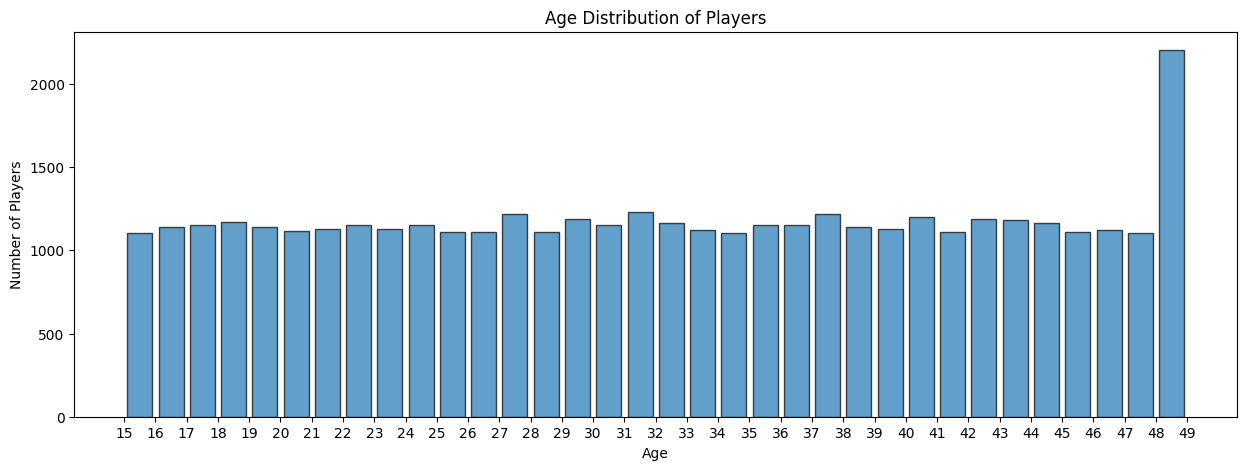

In [53]:
plt.figure(figsize=(15, 5))
plt.hist(data['Age'], bins=range(15, 50), edgecolor='black', alpha=0.7, rwidth=0.8)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.xticks(range(15, 50))
plt.show()

As you can see in the table above, people who are around 49 years old are still playing games. They are more than 2000 players that are age 49. I can see here that any ages can play video games even if that person is a teenager or an adult, they can still have fun playing games. 

#### Gender Distribution

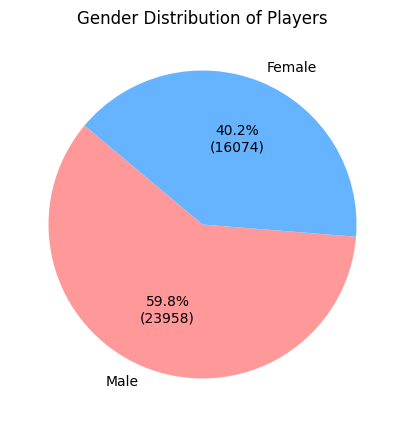

In [54]:
gender_count = data['Gender'].value_counts()

def total_gender_count(val):
    gg_count = int(val/100.*gender_count.sum())
    return f'{val:.1f}%\n({gg_count})'

plt.figure(figsize=(15, 5))
plt.pie(gender_count, labels=gender_count.index, autopct=total_gender_count, startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Gender Distribution of Players')
plt.show()

In the pie charts shown, I can see here that there are more male players playing video game than female players. Having a 59.8% population of male while female have a population of 40.2%. I can say that according to the data shown above, the target audience we should focus on are male audience but it doen't mean that we should ignore the 40.2% of the female audience. 

#### Game Genre Distribution

In [55]:
data['GameGenre'].unique()

genre_count = data['GameGenre'].value_counts()

def total_player_count(val):
    gg_count = int(val/100.*genre_count.sum())
    return f'{val:.1f}%\n({gg_count})'

print(genre_count)

GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64


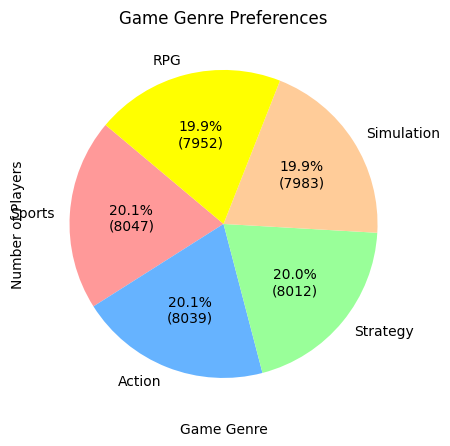

In [56]:
plt.figure(figsize=(15, 5))
plt.pie(genre_count, labels=genre_count.index, autopct=total_player_count, startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#FFFF00'])
plt.title('Game Genre Preferences')
plt.xlabel('Game Genre')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

This is the total population for each genre that the players loves to play. I can see that the most popular genre that are neck to neck are Sports genre and Action genre. Both having a 20.1% with sports having a lead of 8 players. I also see that all five genre are very close to each other in the number of players. 

#### Comparing Each Genre for each Gender

Gender      Female  Male
GameGenre               
Action        3149  4890
RPG           3235  4717
Simulation    3218  4765
Sports        3243  4805
Strategy      3230  4782


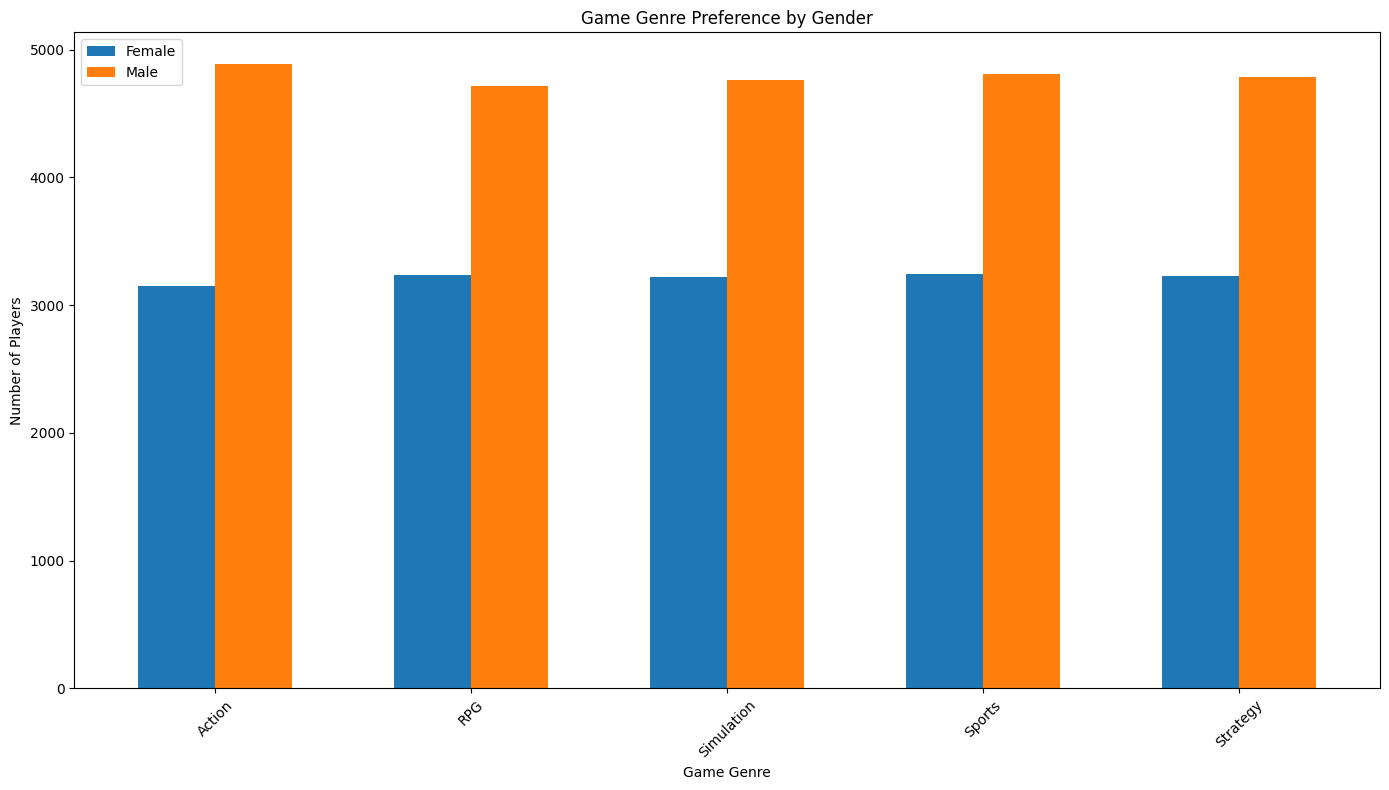

In [57]:
#Grouping the Gender and Genre together
genre_gender_count = data.groupby(['GameGenre', 'Gender']).size().unstack()

gender_list = data['Gender'].unique().tolist()
sorted_gender_list = sorted(gender_list)
legend_labels = {gender: gender for gender in sorted_gender_list}

print(genre_gender_count)
#Plotting the data into a bar Graph
ax = genre_gender_count.plot(kind='bar', figsize=(14,8), width=0.6)
plt.title('Game Genre Preference by Gender')
plt.xlabel('Game Genre')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.legend(legend_labels.values()) 
plt.tight_layout()  
plt.show()

In the data provided, I discovered that the most popular genre for the male players is Action while the most popular genre for the female players is Sports. I also see that for every genre in each gender, all of them are not far from each other. Although male players have more players than female players, the popularity of the genre is near to each other. I noticed when I am analyzing the bar graph, the two gender have different genre that popular which is action for male and sports for female. According to the last pie chart sports is the has the highest population for all gender. The reason is that although male players have more players in action, there are less players playing action in the female side.

#### Comparing Each Genre by Country

Location    Asia  Europe  Other   USA
GameGenre                            
Action      1656    2428    792  3163
RPG         1620    2372    787  3173
Simulation  1623    2414    795  3151
Sports      1582    2431    775  3260
Strategy    1614    2359    786  3253


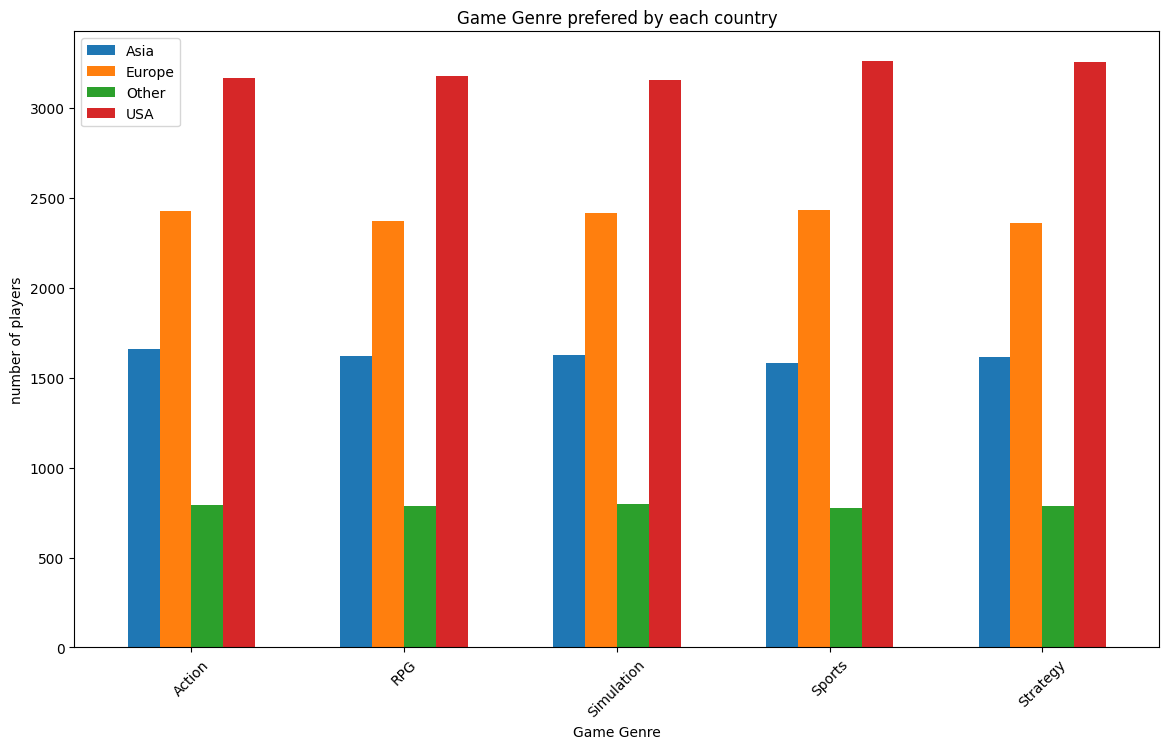

In [58]:
data['Location'].unique()

genre_country_count = data.groupby(['GameGenre', 'Location']).size().unstack()
country_list = data['Location'].unique().tolist()
sorted_country_list = sorted(country_list)

legend_labels = {country: country for country in sorted_country_list}

print(genre_country_count)

genre_country_count.plot(kind='bar', figsize=(14,8), width=0.6)
plt.title('Game Genre prefered by each country')
plt.xlabel('Game Genre')
plt.ylabel('number of players')
plt.xticks(rotation=45)
plt.legend(legend_labels.values())
plt.show()

The data above showed me that USA is the most popular country in video games. Having more players in every genre of the game. The second highest is Europe followed by Asia. The others having lowest score in every genre. I discovered exploring this chart is that like what the previous charts I did, all 5 genres have always been near to each other. Like for example USA is the highest population of players: When they compare all the same country by their genre, their difference is not large. All of them are equally near to each other. This shows that whatever country or gender, the genre will be near to each other with only the difference in the number of players living the country or by their genders. As for the data, the highest number of player in the USA is sports. In Europe, the highest is still sports. In Asia, highest population of players playing the action genre. Lastly, the highest players plays simulation games. 

In [59]:
total_players_count = data.shape[0]
    
genre_country_percentage = genre_country_count.apply(lambda x: (x / total_players_count) * 100, axis=1)
print(genre_country_percentage)

Location        Asia    Europe     Other       USA
GameGenre                                         
Action      4.136484  6.064845  1.978318  7.900784
RPG         4.046560  5.924964  1.965829  7.925763
Simulation  4.054054  6.029875  1.985812  7.870810
Sports      3.951641  6.072339  1.935855  8.143078
Strategy    4.031573  5.892491  1.963331  8.125593


After careful calculation of the percentage of each country who played each genre. I discover that USA and Europe have the highest percentage of player both having 8.14% and 6.07% in the genre sports out of all their genres. Asia's most popular genre is Action having 4.13% of the population out of all their genres. Lastly Others having low population count, simulation is the most popular having a 1.93%. 

In [60]:
genre_country_count.describe()

Location,Asia,Europe,Other,USA
count,5.000000,5.000000,5.000000,5.000000
mean,1619.000000,2400.800000,787.000000,3200.000000
std,26.362853,33.176799,7.648529,52.220686
min,1582.000000,2359.000000,775.000000,3151.000000
25%,1614.000000,2372.000000,786.000000,3163.000000
50%,1620.000000,2414.000000,787.000000,3173.000000
75%,1623.000000,2428.000000,792.000000,3253.000000
max,1656.000000,2431.000000,795.000000,3260.000000


Using the describe function. As you can see, USA and Europe have sports as the most popular genre, action for Asia, and Simulation for other regions. I noticed that Europe is not popular in the genre of action and Asia is not popular in the genre of Sports. USA is not popular in the genre of simulation and other region is not popular in sports. Proving the calculation percentage is correct.

### 5. Correlation

In [92]:
gender_country_data = data.join(pd.get_dummies(data.Gender)).drop(['Gender'], axis=1)
gender_country_data = data.join(pd.get_dummies(data.Location)).drop(['Location'], axis=1)
gender_country_data = data.join(pd.get_dummies(data.EngagementLevel)).drop(['EngagementLevel'], axis=1)




<Axes: >

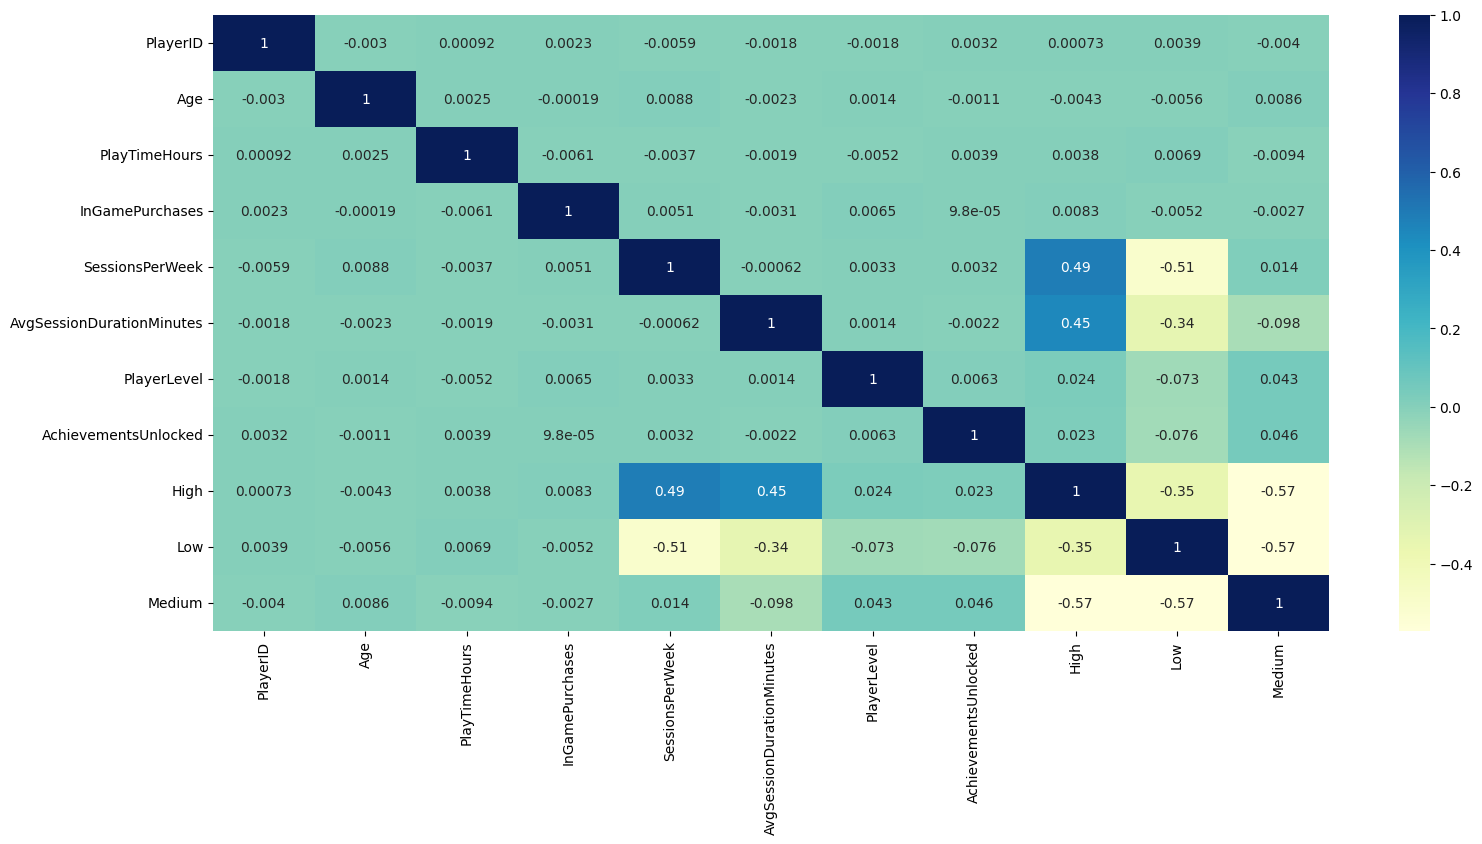

In [90]:
plt.figure(figsize=(18,8))
sns.heatmap(gender_country_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [87]:
Game_Genre_data = data.join(pd.get_dummies(data.GameGenre)).drop(['GameGenre'], axis=1)
new_data = data.join(pd.get_dummies(data.EngagementLevel)).drop(['EngagementLevel'], axis=1)

<Axes: >

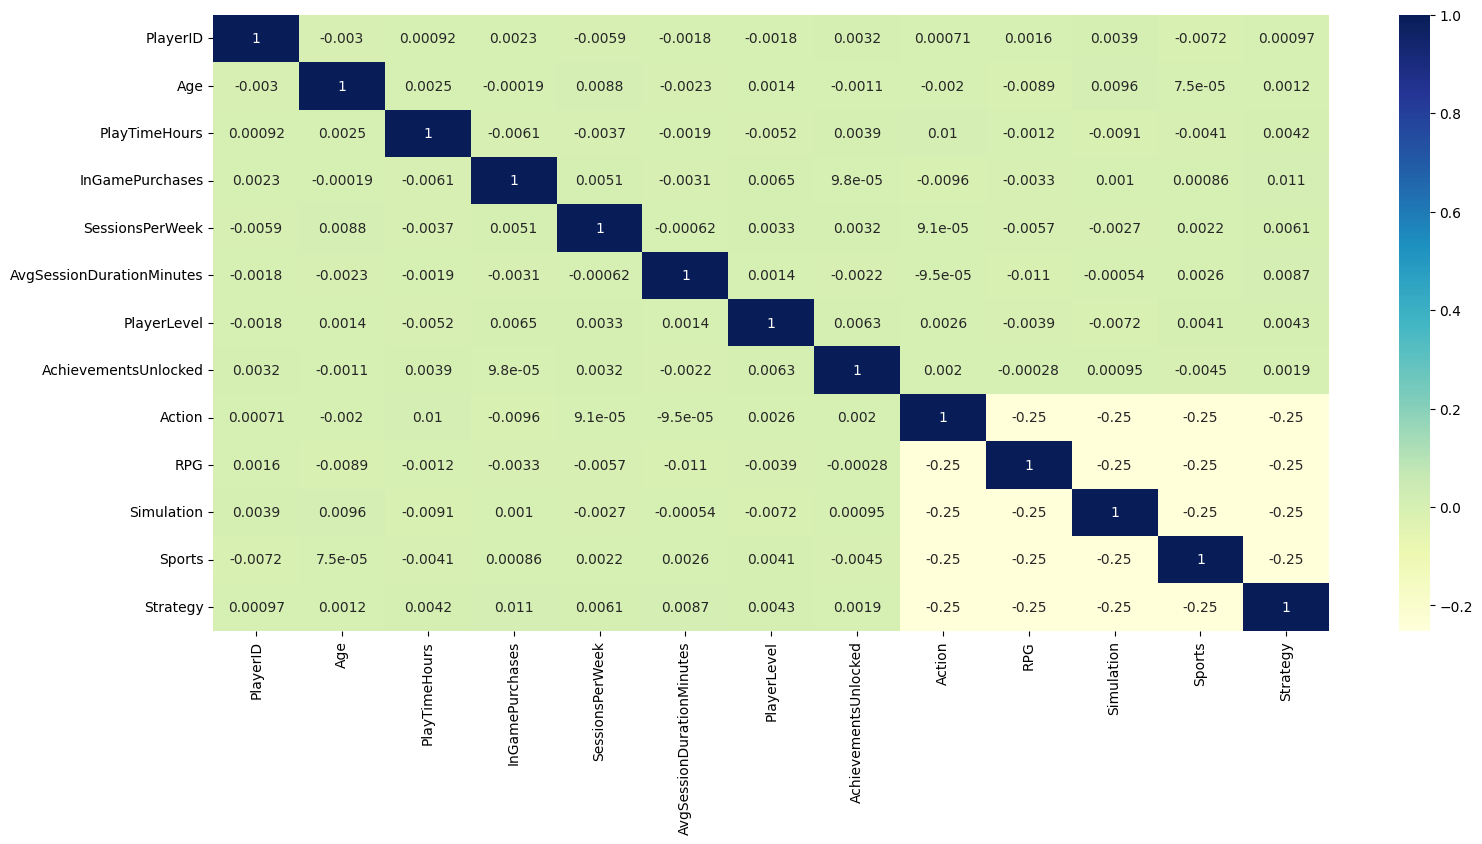

In [88]:
plt.figure(figsize=(18,8))
sns.heatmap(Game_Genre_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [76]:
new_data['NormPlayTime'] = (data['PlayTimeHours']) - data['PlayTimeHours'].mean()/ data['PlayTimeHours'].std()
new_data['NormSessionsPerWeek'] = (data['SessionsPerWeek'] - data['SessionsPerWeek'].mean())/data['SessionsPerWeek'].std()
new_data['NormAvgSessionDurationMinutes'] = (data['AvgSessionDurationMinutes'] - data['AvgSessionDurationMinutes'].mean()) / data['AvgSessionDurationMinutes'].std()
new_data

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,High,Low,Medium,NormPlayTime,NormSessionsPerWeek,NormAvgSessionDurationMinutes
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,False,False,True,14.532146,-0.602355,0.269483
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,False,False,True,3.786989,-0.775856,1.004007
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,True,False,False,6.484783,1.132651,0.963200
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,False,False,True,3.526379,-0.081853,-0.199795
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,False,False,True,13.792972,-1.296358,0.738762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,False,False,True,18.880690,-0.949356,-0.403830
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,True,False,False,11.800308,1.653153,0.391904
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,True,False,False,-1.498916,0.091648,1.656916
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,False,False,True,12.278845,-1.122857,0.677552


<Axes: >

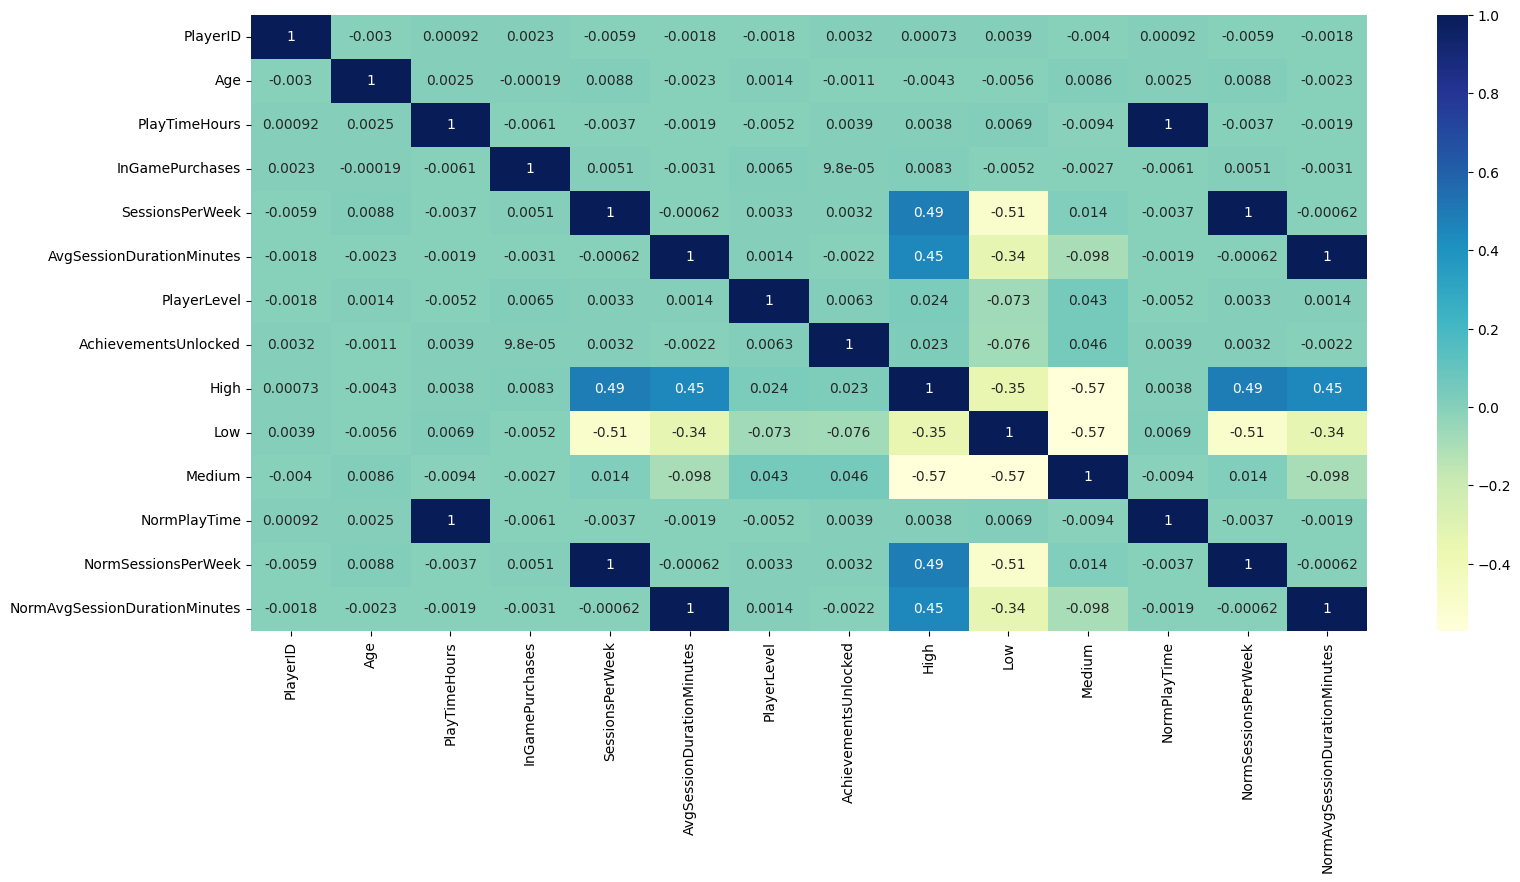

In [84]:
plt.figure(figsize=(18,8))
sns.heatmap(new_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In the correlation, there is a positive relationship between the engagement level of the players with the sessions. Sessions having 0.49 means that the more the session increases, so does the engagement level for high also increases. There is also a negative engagement level for low showing that if the sessions increases, the lesser the player stays in low category. As for the medium category, it shows that the session is near 0.

In [66]:
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


### 6. Machine Learning Model

#### Importing Scikit-learn Library to use Logistic Regression, Accuracy Score, Classification Report

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#### Prepocessing the Data

In [99]:
#Creating copy of data to a new variables
ML_data = data

labelencoder = LabelEncoder()

# Encoding categorical variables if needed
ML_data['Gender'] = labelencoder.fit_transform(ML_data['Gender'])
ML_data['Location'] = labelencoder.fit_transform(ML_data['Location'])
ML_data['GameGenre'] = labelencoder.fit_transform(ML_data['GameGenre'])
ML_data['GameDifficulty'] = labelencoder.fit_transform(ML_data['GameDifficulty'])
ML_data['EngagementLevel'] = labelencoder.fit_transform(ML_data['EngagementLevel'])




#### Training and Testing Data

In [100]:
X = ML_data.drop(['PlayerID', 'EngagementLevel'], axis=1)
y = ML_data['EngagementLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Standardizing the features

In [104]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [107]:
model = LogisticRegression(max_iter=50000)

# Model Training
model.fit(X_train, y_train)

# Making Prediction
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generating a classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8205320344698389
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      2035
           1       0.81      0.70      0.75      2093
           2       0.80      0.89      0.84      3879

    accuracy                           0.82      8007
   macro avg       0.83      0.80      0.81      8007
weighted avg       0.82      0.82      0.82      8007



In [108]:
engagement_distribution = ML_data['EngagementLevel'].value_counts()
print(engagement_distribution)



EngagementLevel
2    19374
0    10336
1    10324
Name: count, dtype: int64


In [116]:
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,1,2,4,16.271119,0,2,6,108,79,25,2
1,9001,29,0,3,4,5.525961,0,2,5,144,11,10,2
2,9002,22,0,3,3,8.223755,0,0,16,142,35,41,0
3,9003,35,1,3,0,5.265351,1,0,9,85,57,47,2
4,9004,33,1,1,0,15.531945,0,2,2,131,95,37,2


In [109]:
labelencoder.classes_

array([0, 1, 2])

### **7. Conclusion**

By thoroughly investigating the data using exploration,analysis,calculation, and predictive modeling using logistic regression on the dataset containing player characteristics and engagement metrics,there are several significant insights have been discovered, shedding light on player behavior and factors influencing engagement levels in the gaming industry.  

#### Exploration Findings:

1. Gender and Reginal Analysis:
> * There is no significant impact between Gender and the EngagementLevel eve though there are a higher number of male players compared to female players.
> * According to the bar chart, USA has emerged as the dominant region for video game players all across the genre(Action, Simulation, Strategy, RPG, and Sports) followed by Europe, then Asia, and other regions. This regional distribution underscores the global appeal and diverse player demographics in gaming.

2. Effect of Sessions on EngagementLevel:
I found out that there is a strong relationship between session durations and engagemet levels while doing the correlation analysis.
> * High Engagement Players: These players exhibited a positive correlation with session duration. It shows that the higher the session duration, the higher the player's engagement to the game.
> * Low Engagement Players: These players exhibited a negative correlation with the session. It showed here that if a player get more session duration, the less likely the player will stay in the low level.

#### Predictive Model Insights:

**Logistic Regression Model Performance**
>  * Using the regression model that trained the datasets, showed a robust  predictive capabilities with an overall accuracy of approximately 82%.

**Classification Report Analysis**
> * The classification report provided detailed metrics for each engagement level category (High, Medium, Low), highlighting precision, recall, and F1-scores:

>>**Class 0 (High Engagement)**: Achieved high precision and recall, indicating accurate identification of highly engaged players.

>> C**lass 1 (Low Engagement)**: Showed moderate performance with lower precision and recall compared to high engagement, suggesting challenges in predicting low engagement levels.

> > **Class 2 (Medium Engagement)**: Demonstrated balanced performance with good precision and recall, indicating reliable predictions for medium engagement levels.
